# Task 2- Prediction using Unsupervised Machine Learning

# Author- Rajdeep Saha

# GRIP @ The Sparks Foundation

In this task, I have predicted the optimum number of clusters and represented them visually for the given 'Iris' dataset.

# Step 1- Loading the Necessary Libraries

In [1]:
library(ggplot2)
library(ggpubr)

# Step 2- Reading the Data

In [2]:
setwd("C:/Users/user/OneDrive/Desktop/Sparks/Task 2")
data<-read.csv("iris.csv")
attach(data)
names(data)

[1] "Id"            "SepalLengthCm" "SepalWidthCm"  "PetalLengthCm"
[5] "PetalWidthCm"  "Species"

# Step 3- Observing the Data

In [3]:
head(data,10)
data<-data[,-1]
head(data,5)
str(data)
summary(data)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,5.1,3.5,1.4,0.2,Iris-setosa
2,2,4.9,3.0,1.4,0.2,Iris-setosa
3,3,4.7,3.2,1.3,0.2,Iris-setosa
4,4,4.6,3.1,1.5,0.2,Iris-setosa
5,5,5.0,3.6,1.4,0.2,Iris-setosa
6,6,5.4,3.9,1.7,0.4,Iris-setosa
7,7,4.6,3.4,1.4,0.3,Iris-setosa
8,8,5.0,3.4,1.5,0.2,Iris-setosa
9,9,4.4,2.9,1.4,0.2,Iris-setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


'data.frame':	150 obs. of  5 variables:
 $ SepalLengthCm: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ SepalWidthCm : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ PetalLengthCm: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ PetalWidthCm : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species      : chr  "Iris-setosa" "Iris-setosa" "Iris-setosa" "Iris-setosa" ...


 SepalLengthCm    SepalWidthCm   PetalLengthCm    PetalWidthCm  
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.054   Mean   :3.759   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   Species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

# Step 4- Visualizing the Data

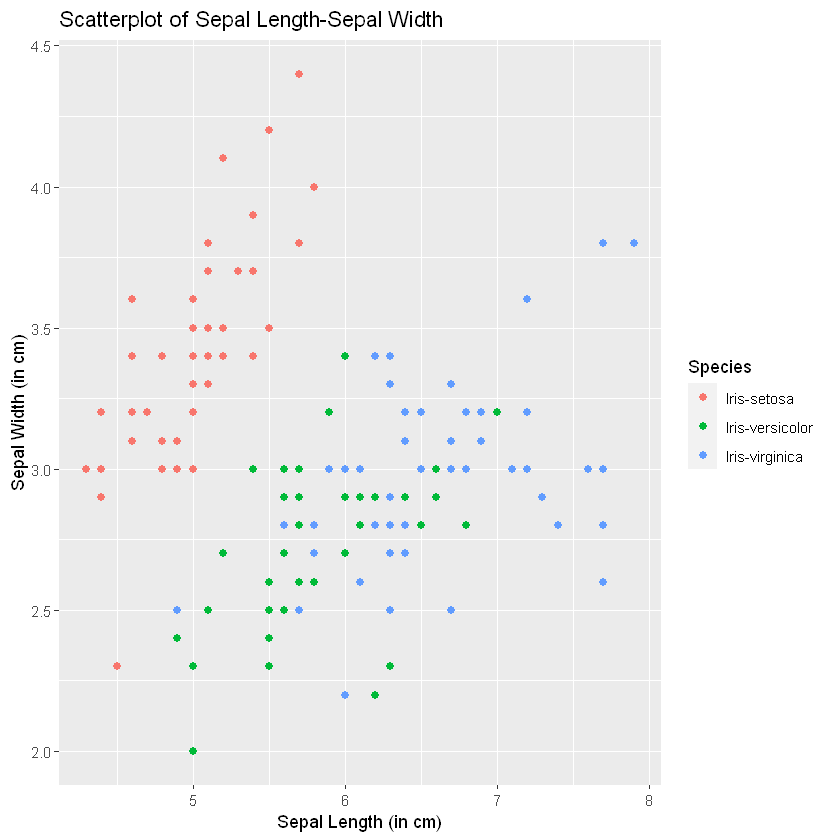

In [4]:
p1<-ggplot(data,aes(x=SepalLengthCm,y=SepalWidthCm,col=Species))+
  geom_point(size=2)+
  xlab("Sepal Length (in cm)")+
  ylab("Sepal Width (in cm)")+
  ggtitle("Scatterplot of Sepal Length-Sepal Width")
p1

# Step 5- Choosing Optimum Number of Clusters (Using Elbow Method)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


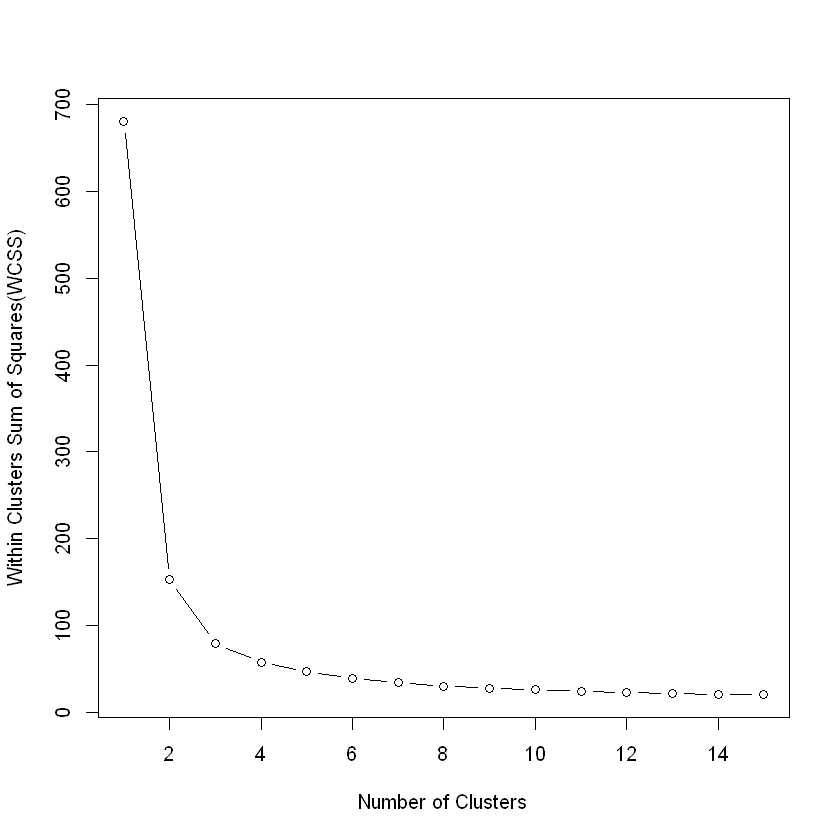

In [5]:
iris_cl=data[,1:4]
head(iris_cl)
set.seed(2021)
wss <-array(0)
for (i in 1:15) {
  km.out <- kmeans(iris_cl, centers = i, nstart = 10, iter.max = 300)
  wss[i] <- km.out$tot.withinss
}
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within Clusters Sum of Squares(WCSS)")

From the above graph, we can see that, after 3, reduction in WCSS is minimal. Hnece, from Elbow Method, we choose the optimum number of clusters to be 3.

# Step 6- Visualizing the Clusters

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1


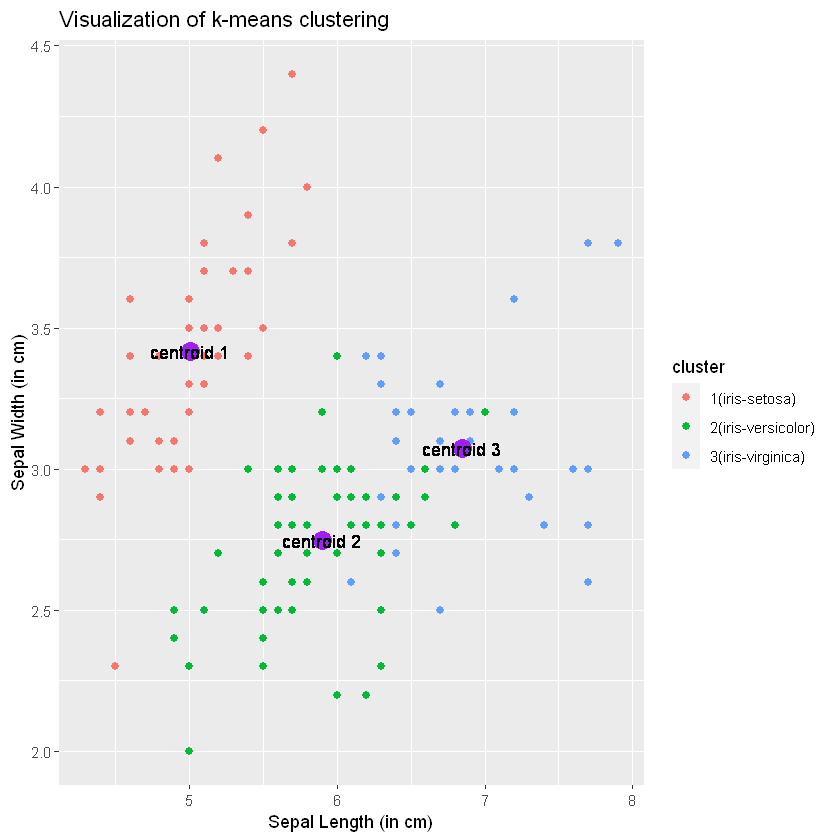

In [6]:
kmeans.cl=kmeans(iris_cl,centers=3,nstart=10)
kmeans.cl$cluster
iris_cl$cluster <- as.character(kmeans.cl$cluster)
head(iris_cl)
p2<-ggplot(iris_cl,aes(x = SepalLengthCm, y =SepalWidthCm,colour=cluster)) +
  geom_point(size=2)+
  geom_point(aes(x=kmeans.cl$center[1,1],y=kmeans.cl$center[1,2]),
  colour="purple",size=5,shape=19)+
  geom_point(aes(x=kmeans.cl$center[2,1],y=kmeans.cl$center[2,2]),
  colour="purple",size=5,shape=19)+
    geom_point(aes(x=kmeans.cl$center[3,1],y=kmeans.cl$center[3,2]),
  colour="purple",size=5,shape=19)+
     geom_text(label="centroid 1",x=kmeans.cl$center[1,1],y=kmeans.cl$center[1,2],color = "black")+
     geom_text(label="centroid 2",x=kmeans.cl$center[2,1],y=kmeans.cl$center[2,2],color = "black")+
     geom_text(label="centroid 3",x=kmeans.cl$center[3,1],y=kmeans.cl$center[3,2],color = "black")+
 scale_shape_discrete(labels = c("1(iris-setosa)", "2(iris-versicolor)","3(iris-virginica)"))+
    scale_color_discrete(labels = c("1(iris-setosa)", "2(iris-versicolor)","3(iris-virginica)"))+
      xlab("Sepal Length (in cm)")+
  ylab("Sepal Width (in cm)")+
  ggtitle("Visualization of k-means clustering")
p2

# Step 7- Comparing with Actual Plot

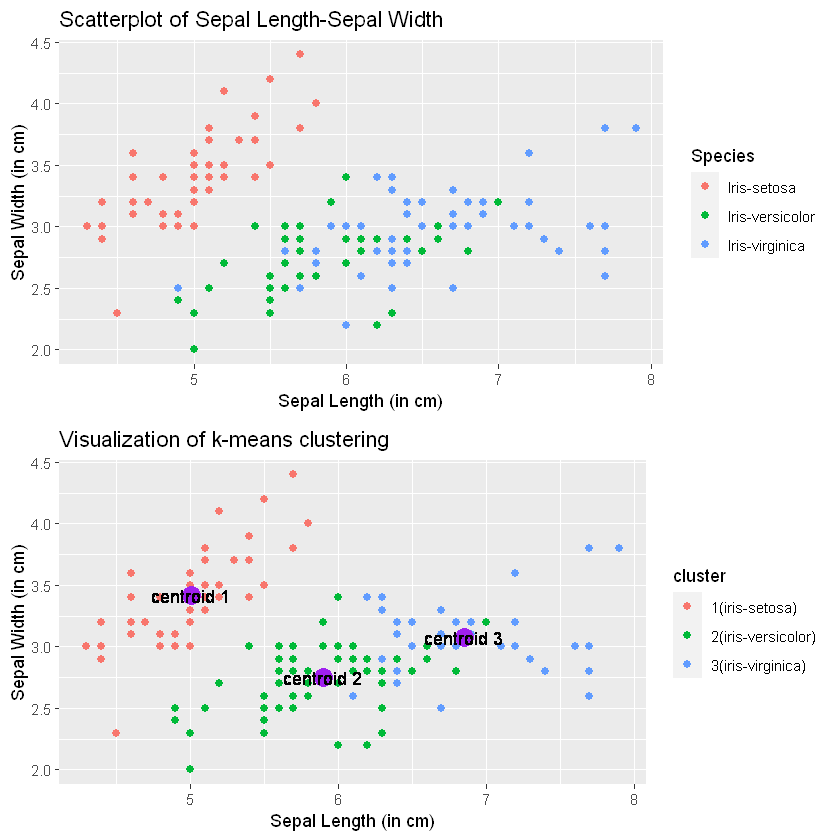

In [7]:
ggarrange(p1,p2,ncol = 1, nrow = 2)

We can see that, the above two graphs look pretty similar.

# Conclusion

I have successfully obtained the optimum number of clusters for this 'Iris' dataset and run the k-means algorithm with the chosen number of clusters.

# Thank You